In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Figure size 1200x600 with 0 Axes>

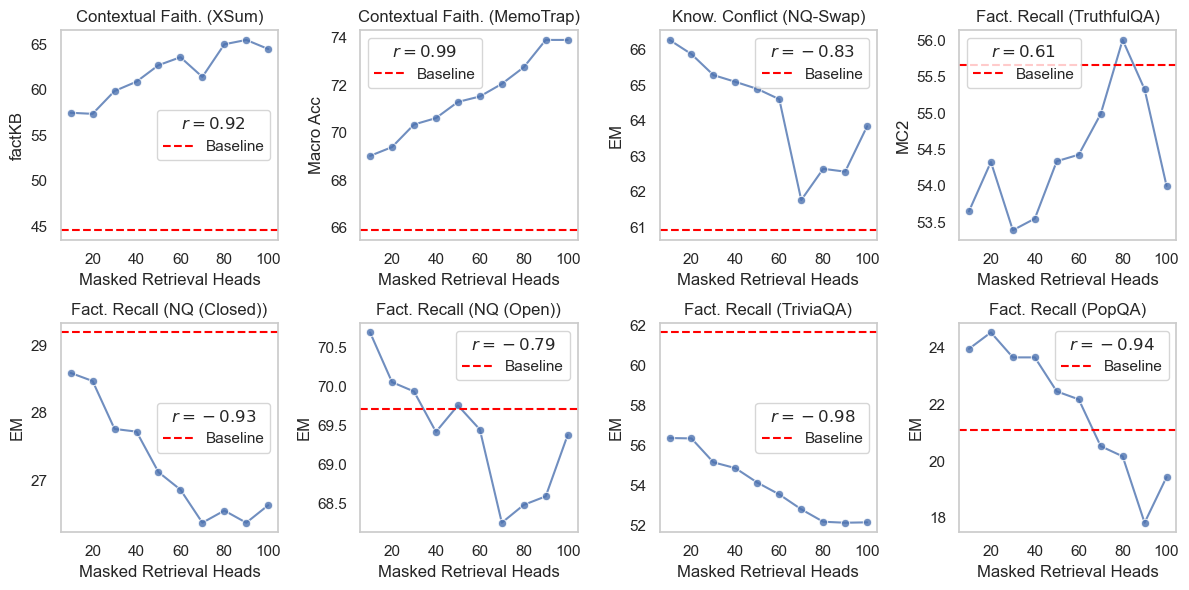

In [27]:
# Data from the LaTeX table
data = {
    "Masked Retrieval Heads": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "Contextual Faith. (XSum)": [44.57, 57.49, 57.37, 59.88, 60.91, 62.72, 63.60, 61.43, 65.02, 65.50, 64.50],
    "Contextual Faith. (MemoTrap)": [65.89, 69.02, 69.39, 70.34, 70.61, 71.29, 71.52, 72.05, 72.75, 73.90, 73.90],
    "Know. Conflict (NQ-Swap)": [60.91, 66.27, 65.87, 65.28, 65.09, 64.89, 64.60, 61.76, 62.64, 62.56, 63.84],
    "Fact. Recall (TruthfulQA)": [55.66, 53.65, 54.33, 53.39, 53.55, 54.34, 54.43, 54.99, 56.01, 55.33, 54.00],
    "Fact. Recall (NQ (Closed))": [29.19, 28.59, 28.47, 27.76, 27.72, 27.12, 26.86, 26.37, 26.55, 26.37, 26.63],
    "Fact. Recall (NQ (Open))": [69.72, 70.70, 70.06, 69.94, 69.42, 69.76, 69.45, 68.25, 68.48, 68.59, 69.38],
    "Fact. Recall (TriviaQA)": [61.64, 56.38, 56.36, 55.17, 54.88, 54.16, 53.57, 52.83, 52.21, 52.16, 52.18],
    "Fact. Recall (PopQA)": [21.10, 23.96, 24.54, 23.66, 23.66, 22.46, 22.18, 20.53, 20.17, 17.83, 19.44],
}

df = pd.DataFrame(data)

# Adjusting the data to exclude the baseline from the x-axis
df_no_baseline = df.iloc[1:]  # Exclude the baseline (first row) from the data

plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.rcParams.update({'font.size': 10})

# Flatten axes for easy iteration
axes = axes.flatten()

metric_names = {
    "Contextual Faith. (XSum)": "factKB",
    "Contextual Faith. (MemoTrap)": "Macro Acc",
    "Know. Conflict (NQ-Swap)": "EM",
    "Fact. Recall (TruthfulQA)": "MC2",
    "Fact. Recall (NQ (Closed))": "EM",
    "Fact. Recall (NQ (Open))": "EM",
    "Fact. Recall (TriviaQA)": "EM",
    "Fact. Recall (PopQA)": "EM",
}

# Plot each column
for i, col in enumerate(df.columns[1:]):
    sns.lineplot(ax=axes[i], x="Masked Retrieval Heads", y=col, data=df_no_baseline, marker="o", alpha=0.8)
    
    # Add baseline line
    axes[i].axhline(y=df[col][0], color='red', linestyle='--', label='Baseline')
    
    # Calculate Pearson correlation
    correlation, _ = pearsonr(df_no_baseline["Masked Retrieval Heads"], df_no_baseline[col])
    
    # Add correlation as legend
    axes[i].legend(title=f'$r={correlation:.2f}$')

    axes[i].grid(False)
    axes[i].set_xticks([20, 40, 60, 80, 100])
    
    axes[i].set_title(col)
    axes[i].set_xlabel('Masked Retrieval Heads')
    axes[i].set_ylabel(metric_names[col])

# Adjust layout
plt.tight_layout()

pdf_path = 'result_num_retrieval_heads_correlation.pdf'
plt.savefig(pdf_path, format='pdf')

plt.show()


/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Figure size 1200x600 with 0 Axes>

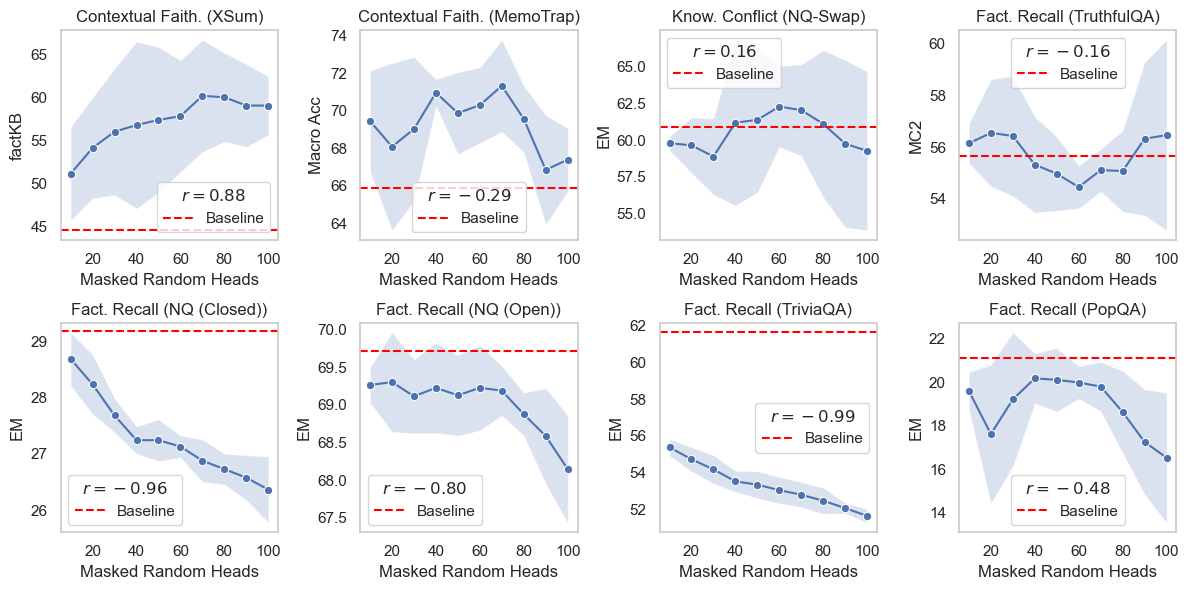

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the CSV file
df = pd.read_csv('../evaluation_results/ablation_masked_random_heads.csv')

# Extract the baseline (first row) and remove it from the dataframe
baseline = df.iloc[0]
df_no_baseline = df.iloc[1:]

# Group data by 'masked random heads' and calculate mean and std dev
grouped_df = df_no_baseline.groupby('Masked Random Heads').agg(['mean', 'std']).reset_index()

# Extract tasks (all columns except 'masked random heads' and 'random seed')
tasks = df.columns[2:]  # Exclude 'masked random heads' and 'random seed'

# Plotting
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.rcParams.update({'font.size': 10})

metric_names = {
    "Contextual Faith. (XSum)": "factKB",
    "Contextual Faith. (MemoTrap)": "Macro Acc",
    "Know. Conflict (NQ-Swap)": "EM",
    "Fact. Recall (TruthfulQA)": "MC2",
    "Fact. Recall (NQ (Closed))": "EM",
    "Fact. Recall (NQ (Open))": "EM",
    "Fact. Recall (TriviaQA)": "EM",
    "Fact. Recall (PopQA)": "EM",
}

# tasks = list(metric_names.keys())

for i, task in enumerate(tasks):
    ax = axes.flatten()[i]  # Select the appropriate subplot
    mean_values = grouped_df[(task, 'mean')].values * 100
    std_values = grouped_df[(task, 'std')].values * 100
    x_values = grouped_df[('Masked Random Heads', '')].values

    # Calculate Pearson correlation
    correlation, _ = pearsonr(x_values, mean_values)
    
    # Use seaborn lineplot with error bars
    sns.lineplot(ax=ax, x=x_values, y=mean_values, marker='o')
    ax.fill_between(x_values, mean_values - std_values, mean_values + std_values, alpha=0.2)
    
    # Add baseline line
    ax.axhline(y=baseline[task] * 100, color='red', linestyle='--', label='Baseline')

    ax.grid(False)

    ax.set_title(task)
    ax.set_xticks([20, 40, 60, 80, 100])
    ax.set_xlabel('Masked Random Heads')
    ax.set_ylabel(metric_names[task])
    ax.legend(title=f'$r={correlation:.2f}$')
    # ax.legend()

plt.tight_layout()
pdf_path = 'result_num_random_heads_correlation.pdf'
plt.savefig(pdf_path, format='pdf')

plt.show()

In [33]:
import pandas as pd

# Group data by 'masked random heads' and calculate mean and std dev
grouped_df = df.groupby('Masked Random Heads').agg(['mean', 'std']).reset_index()

# Columns of interest corresponding to the table
# columns = [
#     "XSum (factKB)", "MemoTrap (Macro Acc)", "NQ (Open Book)",
#     "NQ-Swap", "TruthfulQA (MC2)", "TriviaQA", "PopQA", "NQ (Closed Book)"
# ]

columns = [
    "Contextual Faith. (XSum)",
    "Contextual Faith. (MemoTrap)",
    "Fact. Recall (NQ (Open))",
    "Know. Conflict (NQ-Swap)",
    "Fact. Recall (TruthfulQA)",
    "Fact. Recall (TriviaQA)",
    "Fact. Recall (PopQA)",
    "Fact. Recall (NQ (Closed))",
]

# Prepare the LaTeX table rows
latex_rows = []
for masked_head in grouped_df['Masked Random Heads']:
    row_values = [f"{grouped_df[(col, 'mean')].loc[grouped_df['Masked Random Heads'] == masked_head].values[0]*100:.2f} ± {grouped_df[(col, 'std')].loc[grouped_df['Masked Random Heads'] == masked_head].values[0]*100:.2f}" for col in columns]
    latex_rows.append(f"{masked_head} & " + " & ".join(row_values) + " \\\\")

# Combine all rows into a LaTeX table format
latex_table = """
\\begin{table}[]
    \\centering
    \\resizebox{\\columnwidth}{!}{
    \\begin{tabular}{ccccccccc}
        \\toprule
        \\multirow{2}{*}{\\textbf{Masked Random Heads}} & \\multicolumn{3}{c}{\\textbf{Contextual Faithfulness}} & \\textbf{Knowledge Conflict} & \\multicolumn{4}{c}{\\textbf{Factuality}} \\\\
        \\cmidrule(lr){2-4}
        \\cmidrule(lr){5-5}
        \\cmidrule(lr){6-9}
         & \\textbf{XSum (factKB)} & \\textbf{MemoTrap (Macro Acc)} & \\textbf{NQ (Open Book)} & \\textbf{NQ-Swap} & \\textbf{TruthfulQA (MC2)} & \\textbf{TriviaQA} & \\textbf{PopQA} & \\textbf{NQ (Closed Book)} \\\\
        \\midrule
        \\textit{Baseline}   & 44.57 & 65.89 & 60.91 & 69.72 & 55.66 & 61.64 & 21.10 & 29.19 \\\\
        \\midrule
""" + "\n".join(latex_rows) + """
        \\bottomrule
    \\end{tabular}
    }
    \\caption{Ablation study of number of masked random heads. \\ag{TODO: Do at least 2 more runs to improve result robustness}}
    \\label{tab:result_ablation_num_masked_rand_head_faithfulness}
\\end{table}
"""
latex_table

'\n\\begin{table}[]\n    \\centering\n    \\resizebox{\\columnwidth}{!}{\n    \\begin{tabular}{ccccccccc}\n        \\toprule\n        \\multirow{2}{*}{\\textbf{Masked Random Heads}} & \\multicolumn{3}{c}{\\textbf{Contextual Faithfulness}} & \\textbf{Knowledge Conflict} & \\multicolumn{4}{c}{\\textbf{Factuality}} \\\\\n        \\cmidrule(lr){2-4}\n        \\cmidrule(lr){5-5}\n        \\cmidrule(lr){6-9}\n         & \\textbf{XSum (factKB)} & \\textbf{MemoTrap (Macro Acc)} & \\textbf{NQ (Open Book)} & \\textbf{NQ-Swap} & \\textbf{TruthfulQA (MC2)} & \\textbf{TriviaQA} & \\textbf{PopQA} & \\textbf{NQ (Closed Book)} \\\\\n        \\midrule\n        \\textit{Baseline}   & 44.57 & 65.89 & 60.91 & 69.72 & 55.66 & 61.64 & 21.10 & 29.19 \\\\\n        \\midrule\n0 & 44.57 ± nan & 65.89 ± nan & 69.72 ± nan & 60.91 ± nan & 55.66 ± nan & 61.64 ± nan & 21.10 ± nan & 29.19 ± nan \\\\\n10 & 51.12 ± 5.43 & 69.44 ± 2.70 & 69.27 ± 0.24 & 59.78 ± 0.47 & 56.15 ± 0.78 & 55.38 ± 0.45 & 19.60 ± 0.87 & 28.69 ± 